In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import the files from Google Drive
try:
  from google.colab import drive
  drive.mount('/content/gdrive', force_remount=True)

  FOLDERNAME = 'Projet_malap'
  %cd /content/gdrive/My\ Drive/$FOLDERNAME
except ImportError:
  pass

Mounted at /content/gdrive
/content/gdrive/My Drive/Projet_malap


Import the pre-processed data

In [ ]:
#Read training data

train_data = pd.read_csv('pre_processing_train_data.csv')
train_data=train_data.iloc[:,1:]


Select a sample to train faster

In [ ]:
train_sample = train_data.sample(n=10000)
#dfsample = rebuild_data(df,dfsample) # new line added in order to imporve the sample
train_labels=train_sample['Category']
print(len(train_labels.unique()))
train_labels.head()
train_sample.drop('Category',inplace =True, axis=1)
train_sample.head()

37


,X,Y,Year,X_Bar_District,Y_Bar_District,Sin_Year,Cos_Year,Sin_Hour,Cos_Hour,Sin_Day_m,Cos_Day_m,Sin_Month,Cos_Month,Sin_Day_w,Cos_Day_w
97450,-122.390412,37.736010,0.833333,-122.393550,37.737256,-0.108867,9.940563e-01,-0.258819,9.659258e-01,-0.988468,0.151428,5.000000e-01,0.866025,-0.433884,-0.900969
465075,-122.411747,37.751035,-0.166667,-122.419409,37.759961,-0.906308,4.226183e-01,-0.965926,2.588190e-01,-0.651372,-0.758758,-8.660254e-01,0.500000,-0.781831,0.623490
581520,-122.409795,37.780036,-0.333333,-122.405282,37.779915,-0.258819,9.659258e-01,-0.258819,9.659258e-01,-0.790776,-0.612106,8.660254e-01,0.500000,0.781831,0.623490
871006,-122.424196,37.743445,-1.000000,-122.428831,37.726543,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16,0.848644,0.528964,8.660254e-01,0.500000,0.974928,-0.222521
843679,-122.416650,37.808166,-1.000000,-122.409619,37.795685,0.946930,3.214395e-01,0.866025,5.000000e-01,0.299363,-0.954139,1.224647e-16,-1.000000,-0.974928,-0.222521


In [ ]:
# Load Library
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

X=train_sample
y=train_labels

# Split the training test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




First try

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(12),solver='adam')
clf.fit(X_train, y_train)
# p_pred = clf.predict_proba(X_test)
# print(log_loss(y_test,p_pred))
clf.score(X_test, y_test)

0.206

We want to make a cross validation on the MLP classifier model. The main parameters are the number of hidden layers and the number of nodes in each layer. \
We will first choose one layer and perform a cross validation on a large range of number of nodes in this layer (1 to 100). \

In [ ]:
# cross val for one layer
def plot_cross_val_one_layer(test_range, X, y, cv=5):
  l = []
  for k in test_range:
      clf = MLPClassifier(hidden_layer_sizes=(k), solver='adam')
      scores = cross_val_score(clf,X,y,cv=cv)
      l.append(scores)
  l = np.asarray(l)
  plt.errorbar(test_range, l.mean(axis=1), l.std(axis=1), fmt='-k')


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

<ErrorbarContainer object of 3 artists>

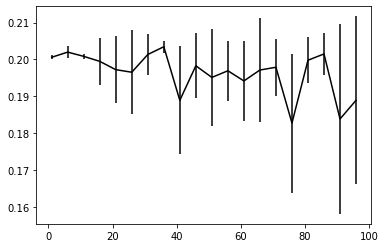

In [ ]:
# wide test range
test_range = list(range(1, 100, 5))
plot_cross_val_one_layer(test_range, X, y)

We deduce from the graph above that only a few nodes are needed so we perform a more precise cross validation on a smaller range (1 to 40).

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 

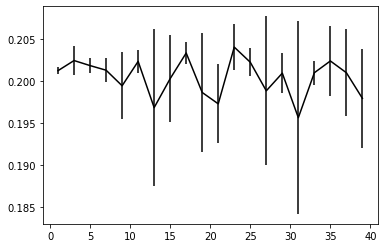

In [ ]:
# small test range
test_range = list(range(1, 40, 2))
plot_cross_val_one_layer(test_range, X, y)

Again from the results on the graph above we try on little range (23 to 27).

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

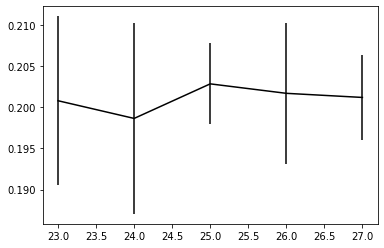

In [ ]:
# smaller test range
test_range = list(range(23, 28))
plot_cross_val_one_layer(test_range, X, y, cv=10)

We deduce that the best number of node for one layer is 25 with an accuracy between 20% and 21%. \
We finally perform a cross validation on a particuliar type of two layers MLP ((2*k,k) with k from 8 to 15) and we immediatly see that the results are not better so we keep only one layer.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 

<ErrorbarContainer object of 3 artists>

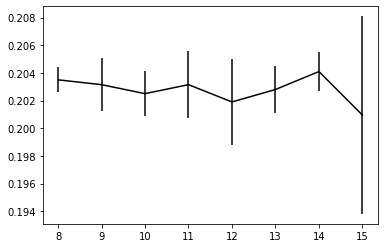

In [ ]:
# cross val for two layers
l = []
test_range = list(range(8,16))
for k in test_range:
    clf = MLPClassifier(hidden_layer_sizes=(2*k,k), solver='adam')
    scores = cross_val_score(clf,X,y)
    l.append(scores)
l = np.asarray(l)
plt.errorbar(test_range, l.mean(axis=1), l.std(axis=1), fmt='-k')

The accuracy of this model is a bit worse than the random forest so we won't keep it.